_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv")
df

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2
5,2017-07-17 12:28:33.970009,108,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.2,6.2,9,37,0,3,...,34.3,0.0,2.8,0.9,0.9,2.8,5.6,1.9,5.6,45.4
6,2017-07-17 12:28:34.199847,17,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.7,8.4,10,2,0,0,...,11.8,0.0,0.0,0.0,5.9,0.0,0.0,11.8,0.0,70.6
7,2017-07-17 12:28:34.381001,196,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,4.3,5.0,2,92,7,3,...,46.9,3.6,1.5,0.5,3.1,2.0,2.0,2.0,6.1,32.1
8,2017-07-17 12:28:34.590224,164,Males Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-ma...,4.1,4.5,1,85,6,3,...,51.8,3.7,1.8,0.6,3.0,1.8,2.4,1.8,7.3,25.6
9,2017-07-17 12:28:34.807101,25,Females Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-fe...,7.2,8.2,10,5,0,0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0


In [32]:
df.timestamp = pd.to_datetime(df.timestamp)

In [33]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [45]:
df.groupby('category').agg({'respondents': np.sum})

,respondents
category,
Aged 18-29,1529109
Aged 30-44,2580837
Aged 45+,1775163
Aged under 18,47507
Females,864707
Females Aged 18-29,140945
Females Aged 30-44,252589
Females Aged 45+,366101
Females under 18,7975


In [50]:
z = df.tail(1)
a= df.head(1)
columns= ['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct',
               '8_pct','9_pct','10_pct',]
a[columns]
z[columns]


,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80052,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [52]:
b = a[columns].append(z[columns])
b

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
80052,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


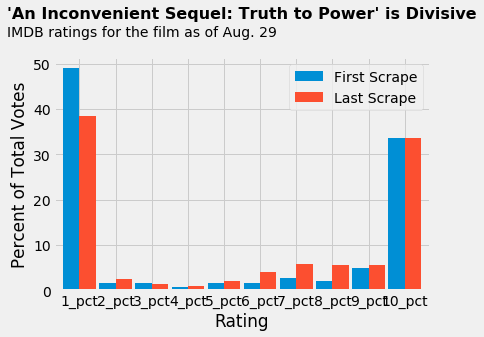

In [62]:
#b.T.plot.bar()
plt.style.use('fivethirtyeight')
ax = b.T.plot.bar( width=0.9)
#ax = b.T.plot.bar(color=['#EC713B', 'b'], width=0.9)
ax.set(xlabel= 'Rating',
      ylabel = 'Percent of Total Votes',
      yticks=range(0,51,10))
ax.text(x=-2,y=60,s= "'An Inconvenient Sequel: Truth to Power' is Divisive", 
        fontsize=16, fontweight='bold' )
ax.text(x=-2,y=56, s= "IMDB ratings for the film as of Aug. 29")
ax.tick_params(labelrotation=0)
ax.legend(['First Scrape','Last Scrape'])

# Assignment

In [72]:
type(df['1_pct'][0])

numpy.float64

In [118]:
df['2-9']= (df['2_pct'] + df['3_pct']+ df['4_pct']+ df['5_pct']+
            df['6_pct']+ df['7_pct']+ df['8_pct']+ df['9_pct'])
df['2-9_votes'] = (df['2_votes']+df['3_votes']+df['4_votes']+df['5_votes']+
                   df['6_votes']+df['7_votes']+df['8_votes']+df['9_votes'])

In [113]:
md = df[ (df['category'] == 'Males')]
fd = df[ (df['category'] == 'Females')]

In [115]:
pd.options.display.max_columns = None
md

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct,2-9,2-9_count,2-9_votes
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6,17.2,70,70
18,2017-07-17 12:34:17.770310,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6,17.2,70,70
36,2017-07-17 13:00:02.497484,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6,17.2,70,70
54,2017-07-17 14:00:02.990387,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,3,7,7,11,8,20,135,49.1,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5,17.2,70,70
72,2017-07-17 15:00:02.218990,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,3,7,7,11,8,20,135,49.1,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5,17.2,70,70
90,2017-07-17 16:00:02.165460,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,3,7,7,11,8,20,135,49.1,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5,17.2,70,70
108,2017-07-17 17:00:02.466381,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,3,7,7,11,8,20,135,49.1,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5,17.2,70,70
126,2017-07-17 18:00:02.761381,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,3,7,7,11,8,20,135,49.1,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5,17.2,70,70
144,2017-07-17 19:00:02.633552,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,3,7,7,11,8,20,135,49.1,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5,17.2,70,70
162,2017-07-17 20:00:01.686919,403,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,4.9,2,198,7,7,3,7,7,11,8,20,135,49.1,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.5,17.2,70,70


### colors
https://html-color-codes.info/colors-from-image/?imageLoader=#

In [209]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0831-71.png?w=575'
hmm= Image(url=url, width=400)

display(hmm)

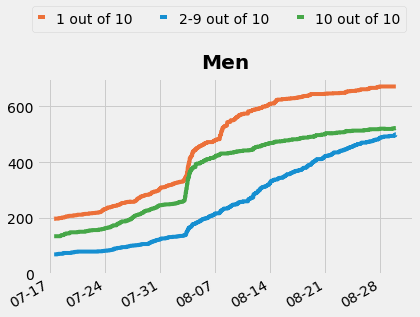

   respondents  1_votes  10_votes
0          402      197       135 remainder = 70


In [299]:
import matplotlib.dates as mdates
#data
data = pd.DataFrame(md[['timestamp','1_votes', '2-9_votes', '10_votes']])
ts = md.timestamp
#plot
ax = data.plot.line( x='timestamp', color=color,legend=False)
#style
plt.style.use('fivethirtyeight')
color =['#ec7039',  '#168fd1', '#46a748']
ax.set_title("Men",weight='bold',pad= 10)



#axes
ax.set(yticks=range(0,799,200))
xfmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(xfmt)

#legend
ax.legend(["1 out of 10", "2-9 out of 10", "10 out of 10"], 
          bbox_to_anchor=(0., 1.3, 1., .102),
          loc='upper right', handlelength = 00.5, 
          handleheight = 1, ncol=3, markerscale=0.01)
ax.set_xlabel("")

plt.show(),display(hmm), 
print(md[['respondents','1_votes','10_votes']].head(1),"remainder = " + str(md['respondents'][0]-md['1_votes'][0]-md['10_votes'][0]))

In [281]:
import altair as alt
alt.renderers.enable('notebook')



RendererRegistry.enable('notebook')

In [290]:
data1= data
data1

,timestamp,1_votes,2-9_votes,10_votes
0,2017-07-17 12:28:32.785639,197,70,135
18,2017-07-17 12:34:17.770310,197,70,135
36,2017-07-17 13:00:02.497484,197,70,135
54,2017-07-17 14:00:02.990387,198,70,135
72,2017-07-17 15:00:02.218990,198,70,135
90,2017-07-17 16:00:02.165460,198,70,135
108,2017-07-17 17:00:02.466381,198,70,135
126,2017-07-17 18:00:02.761381,198,70,135
144,2017-07-17 19:00:02.633552,198,70,135
162,2017-07-17 20:00:01.686919,198,70,135


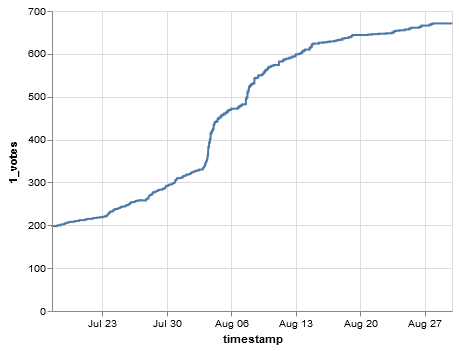

In [288]:
alt.Chart(data).mark_line().encode(x='timestamp', y= '1_votes')

,timestamp,1_votes,2-9_votes,10_votes
0,2017-07-17 12:28:32.785639,197,70,135
18,2017-07-17 12:34:17.770310,197,70,135
36,2017-07-17 13:00:02.497484,197,70,135
54,2017-07-17 14:00:02.990387,198,70,135
72,2017-07-17 15:00:02.218990,198,70,135
90,2017-07-17 16:00:02.165460,198,70,135
108,2017-07-17 17:00:02.466381,198,70,135
126,2017-07-17 18:00:02.761381,198,70,135
144,2017-07-17 19:00:02.633552,198,70,135
162,2017-07-17 20:00:01.686919,198,70,135


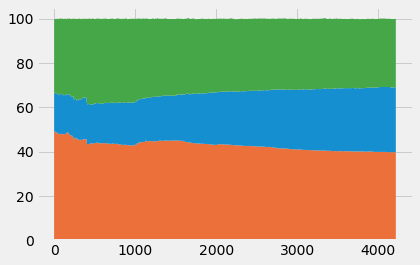

In [133]:
data = md[['timestamp','1_pct', '2-9', '10_pct']]
plt.style.use('fivethirtyeight')
#ax = data.plot.stackplot(color=['#ec7039',  '#168fd1', '#46a748'])
fit, ax = plt.subplots()
a = data['1_pct']
b = data['2-9']
c = data['10_pct']
x = range(0,4216,1)


ax.stackplot(x, a,b,c, colors=['#ec7039',  '#168fd1', '#46a748'])

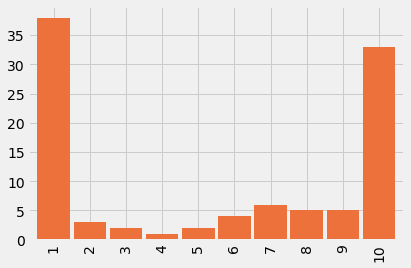

In [11]:
plt.style.use('fivethirtyeight')
fake.plot.bar(color='#EC713B', width=0.9)

In [12]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

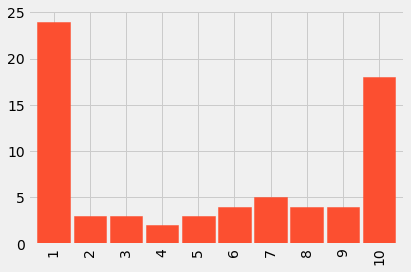

In [14]:
fake2.value_counts().sort_index().plot.bar(Color='C1', width=0.9);

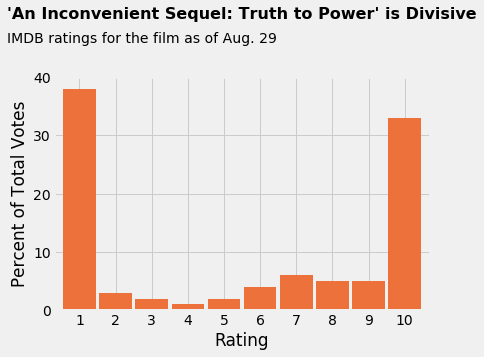

In [31]:
plt.style.use('fivethirtyeight')
ax = fake.plot.bar(color='#EC713B', width=0.9)
ax.set(xlabel= 'Rating',
      ylabel = 'Percent of Total Votes',
      yticks=range(0,41,10))
ax.text(x=-2,y=50,s= "'An Inconvenient Sequel: Truth to Power' is Divisive", 
        fontsize=16, fontweight='bold' )
ax.text(x=-2,y=46, s= "IMDB ratings for the film as of Aug. 29")
ax.tick_params(labelrotation=0)